In [6]:
import tensorflow as tf
from tensorflow.python.keras import models as m
from tensorflow.python.keras import layers as l

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import confusion_matrix, fbeta_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

import seaborn as sn
import pandas as pd

from ROOT import TFile, TTree, TChain
from ROOT import TH1F, TCanvas

import os
import sys
sys.path.insert(0, os.path.abspath('/home/arsahasransu/Documents/SoftDisplacedLeptons/Classifier/'))

print("All classes initialized successfully!!!")

All classes initialized successfully!!!


In [7]:
import plotBeautifier as pB

In [8]:
pB.trial_func("AR")

Trial works fine. Hello,AR


In [9]:
# Load the input data scaler
scaler = joblib.load("../scaler.save")

# Load the model
loaded_model = m.load_model("../simplePer.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                180       
_________________________________________________________________
dropout (Dropout)            (None, 18)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 38        
Total params: 560
Trainable params: 560
Non-trainable params: 0
_________________________________________________________________


0	

<Figure size 432x288 with 0 Axes>

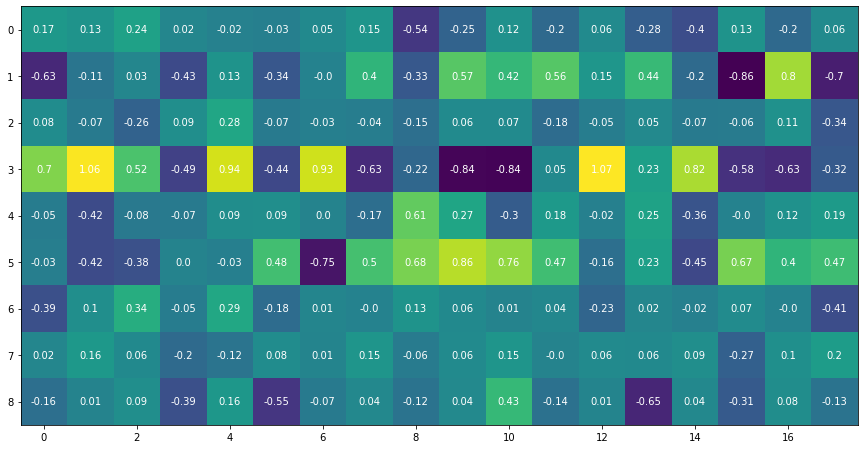

(9, 18)	(18,)	
1	
2	

<Figure size 432x288 with 0 Axes>

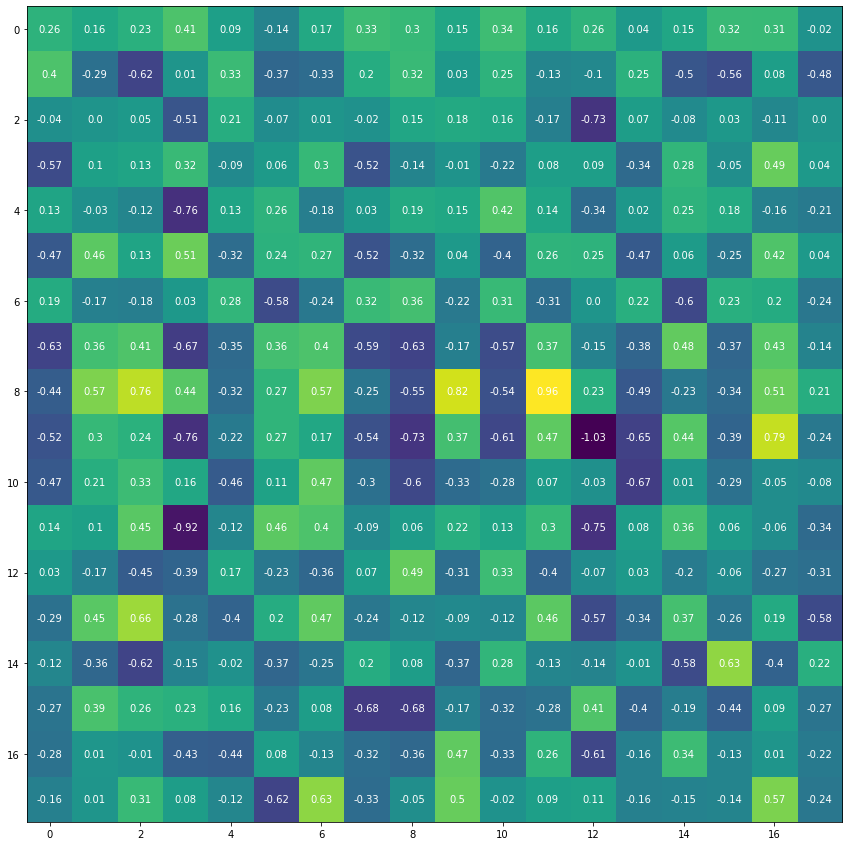

(18, 18)	(18,)	
3	
4	

<Figure size 432x288 with 0 Axes>

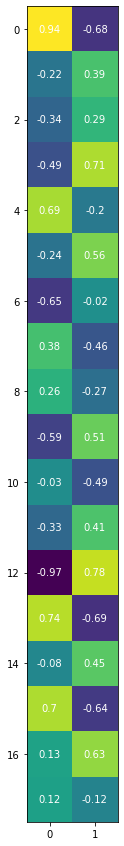

(18, 2)	(2,)	


In [18]:
ctr=0
for layer in loaded_model.layers:
    print(ctr, end="\t")
    layerWghts = layer.get_weights()
    if(len(layerWghts)==2):
        layerWght = layerWghts[0]
        layerBias = layerWghts[1]

        np.append(layerWght, layerBias)
        
        plt.clf()
        fig, ax = plt.subplots(figsize=(15,15))
        im = ax.imshow(layerWght)
        for i in range(len(layerWght)):
            for j in range(len(layerWght[0])):
                text = ax.text(j, i, round(layerWght[i, j],2),
                       ha="center", va="center", color="w")
        plt.show()
        
        print(layerWght.shape, end="\t")
        print(layerBias.shape, end="\t")
    
    print()
    ctr = ctr+1